<a href="https://colab.research.google.com/github/Nick7900/permutation_test/blob/main/c_within_session_continuous_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform permutation - Within-session continuous tests
In this tutorial, we will demonstrate how to use the ```within_session_continuous_tests``` function.
You should perform the ```within_session_continuous_test``` when you have brain activity data and a continuous dependent variable measured within the same session or experimental session. The test is specifically designed to assess the relationship between brain activity and a continuous variable over time within the context of a single session.

When ```within_session_continuous_tests ``` can be useful:
* **Hidden Markov Models (HMMs) or State Decoding**: If you have used HMMs or other state decoding techniques to infer brain states from neural data, you can decode the viterbi path representing the most likely sequence of brain states over time. The ```within_session_continuous_test``` allows you to assess the statistical significance of associations between the viterbi path (representing brain states) and a continuous dependent variable.

* ---More options


## Permutation testing
Permutation testing is a resampling technique that involves random permutation of the observed data and comparing it to the observed effectto by generating a null distribution under the null hypothesis.

The null hypothesis states that there is no difference or association between variables of interest.

By comparing the observed test statistic with the distribution of test statistics under the null hypothesis, we can determine the p-value and assess the significance of the effect.

Permutation testing (non-parametric) is particularly useful when the underlying data distribution is unknown or violates certain assumptions required by parametric tests. It provides a flexible and robust alternative for hypothesis testing, especially in cases where parametric assumptions cannot be met.


## Step 0: Import Required Libraries
Let's begin by importing the necessary libraries for our analysis. We'll be using ```os```,```numpy```, ```pandas```, for loading the data and for data manipulation.

Furthermore, we will need to import the **GLHMM-package** as ```glhmm```:

If you dont have the **GLHMM-package** installed, then run the following command in your terminal:

```pip install --user git+https://github.com/vidaurre/glhmm```

To use the helper function ```my_functions``` you need to install the library's:
```
pip install mat73
```
```
pip install statsmodels
```
```
pip install tqdm
```

When using **Google Colab** we need to import the following libraries, so we can load the data of interest

```
!pip install requests
!pip install gdown
```

In [1]:
!pip install mat73
!pip install statsmodels
!pip install tqdm
!pip install requests
!pip install gdown

## Download the GLHMM package

In [3]:
!git clone https://github.com/vidaurre/glhmm
%cd glhmm

Cloning into 'glhmm'...
remote: Enumerating objects: 863, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 863 (delta 75), reused 65 (delta 40), pack-reused 707
Receiving objects: 100% (863/863), 12.61 MiB | 30.38 MiB/s, done.
Resolving deltas: 100% (506/506), done.
/content/glhmm


### Import packages

In [4]:
import os
import numpy as np
import pandas as pd
from glhmm import glhmm
import requests
import gdown

### Load Helper function

In [5]:
%cd ..
# Import helper function
# Get the raw github file
url = 'https://raw.githubusercontent.com/Nick7900/permutation_test/main/helper_functions/my_functions.py'
r = requests.get(url)
# Save the function to the directory
with open("my_functions.py","w") as f:
  f.write(r.text)

/content


### Load Permutationt testing functions

In [6]:
# Import helper function
# Get the raw github file
url = 'https://raw.githubusercontent.com/Nick7900/permutation_test/main/helper_functions/permutation_test.py'
r = requests.get(url)
# Save the function to the directory
with open("permutation_test.py","w") as f:
  f.write(r.text)

## Step 1: Loading Data Files
First, we need to load data files into our Python environment.
We will be working with two data files **X_memory.npy**, **y_memory.npy** and **data_idx_memory.npy**.

For this example we are analyzing memory task data measured inside a Magnetoencephalography (MEG) scanner at different sessions and over multiple trials for 1 subject.


## Step 1: Loading Data Files
First, we need to load data files into our Python environment.
We will be working with two data files **vpath_memory.npy** and **y_memory.npy**

For this example we are analyzing memory task data measured inside a Magnetoencephalography (MEG) scanner at different sessions and over multiple trials for 1 subject.

# Load directly from google drive
Remove the text **file/d/** from the link and replace it with **uc?id=**

Now remove the section after the file ID, including **/view** and replace it with **&export=download** in place of the text you have removed


In [8]:
# Downlod files from google colab
# Load X_data (X_memory_con)
url = "https://drive.google.com/uc?id=1Z0Dz2tbFNm6t-Jcxx5eqWgW9-rtUjdAb&export=download"
gdown.download(url, quiet=False)

# Load dependent variables (y_memory_con)
url = "https://drive.google.com/uc?id=1OwMMjxmY8r3wz1NT0paBx8Jxd6UAvZ3K&export=download"
gdown.download(url, quiet=False)

# Load indices
url = "https://drive.google.com/uc?id=17wf6G1AM5tvghbYH_ptPnP2XgQdzXxMM&export=download"
gdown.download(url, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Z0Dz2tbFNm6t-Jcxx5eqWgW9-rtUjdAb&export=download
To: /content/X_memory_con.npy
100%|██████████| 844M/844M [00:11<00:00, 73.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OwMMjxmY8r3wz1NT0paBx8Jxd6UAvZ3K&export=download
To: /content/y_memory_con.npy
100%|██████████| 13.2M/13.2M [00:00<00:00, 81.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=17wf6G1AM5tvghbYH_ptPnP2XgQdzXxMM&export=download
To: /content/vpath_3_memory.npy
100%|██████████| 26.4M/26.4M [00:00<00:00, 149MB/s]


'vpath_3_memory.npy'

In [13]:
# Show the shape of the data
current_directory = os.getcwd()
folder_name = ""
file_name = '/X_memory_con.npy'

# Load X data
file_path = os.path.join(current_directory+folder_name+file_name)
X_data = np.load(file_path)

# Load y data
file_name = '/y_memory_con.npy'
file_path = os.path.join(current_directory+folder_name+file_name)
D_data = np.load(file_path)


# Load indices
file_name = '/vpath_3_memory.npy'
file_path = os.path.join(current_directory+folder_name+file_name)
vpath_data = np.load(file_path)


print(f"Data dimension of X Memory data: {X_data.shape}")
print(f"Data dimension of y Memory data: {D_data.shape}")
print(f"Data dimension of viterbi path Memory data: {vpath_data.shape}")

Data dimension of X Memory data: (1648750, 64)
Data dimension of y Memory data: (1648750,)
Data dimension of viterbi path Memory data: (1648750, 2)


### Step 1.1 : Look at the data

Now we can look at the data structure.
- X_data: 2D array of shape [(n_timepoints X n_trials), n_features]
- D_data: 1D array of shape [(n_timepoints X n_trials,)]
- vpath_data: 2D array of shape [(n_timepoints X n_trials), n_states]

```X_data``` represents the subject's continuous measurements. It consists of two elements: ```[1648750, 64]```. The subject competed in ```6595``` trials over a period of time, with each time being measured over a period of ```250``` timestamps, giving the number of the first element ```1648750 (6595x250)```. Each trial consists of measuring ```64``` channels inside the MEG scanner.\

For each of the continuos trials ```1648750```, we have design-matrix ```D_data = [1648750,]```. This is an array containing only 0s and 1s. The values in this array indicate whether an image of an animated or inanimate object was shown on a screen during each trial.

In the notebook **3.preprocessing_Viterbi_path** we trained the Viterbi path of ```X_data``` with ```3``` states. That is why ```vpath_data``` got the shape of ```[1648750, 3]```

## Step 2: Data Preparation

We need to preprocess our data before we can run permutation testing. This could include dealing with missing numbers, standardizing the data, or doing any required modifications.

In this case,our data has already been preprocessed and is ready for analysis.\
If you need to run any preprocessing processes on your data, you can do so in this section.



# Within-session tests for continuous sessions Permutation Testing

In this tutorial, we will use the function ```within_session_continuous_test``` to perform within-session continuous test with surrogate viterbi path. This approach allows us to evaluate whether the observed relationship between brain activity (represented by the viterbi path) and a continuous dependent variable is statistically significant.

In neuroscience research, it is often of interest to study the relationship between brain activity and behavioral variables over time. Hidden Markov Models (HMMs) are frequently employed to decode brain states from neural data. Given the measured brain activity, the viterbi path represents the most probable order of brain states.

To determine the statistical significance of the observed patterns in the data, the Within-Session Continuous Test requires performing Viterbi path permutation.



## Step 3: Permutation testing - Continues


The ```within_session_continuous_tests``` function is used to do continuous permutation testing within a session. This sort of testing is carried out when the data consists of multiple trial over a period of time during a session and the purpose is to determine the statistical significance of the connection between the input data ```vpath``` and the dependent variable data ```D_data``` across time.

In [11]:
# import between_subject_test
from permutation_test import within_session_continuous_test # This function should just be in the GLHMM package

### Parameters
The ```within_session_continuous_tests``` function accepts the following parameters:
* vpath (ndarray): Input data of shape (n_trials, n_features).
* D_data (ndarray): The Design-matrix/dependent variable data of shape (n_trials, n_predictions)
* n_states (ndarray): The number of states
* method (str): Method for performing permutation test for regression coefficients or permutation with correlation
* Nperm (int): Number of permutations to perform (default: 1000).
* test_statistic_option (bool, optional): If True, return the test statistic values. Default is False.





### Returns
The ```within_session_continuous_tests``` function returns two ndarrays:
* pval (numpy.ndarray): Array of p-values of shape (n_timepoints, n_features).
* corr_pval (numpy.ndarray): Array of correlation p-values of shape (n_timepoints, n_features, n_predictions).

### 3.1: Example of usage - Regression
We demonstrated how to run the Viterbi path permutation by using the ```within_session_continuous_tests``` function.
The Viterbi path is used as a surrogate for the true hidden state sequence, which is a crucial component in the underlying model used for the permutation test.

The Viterbi path is a state sequence that maximizes the combined probability of observable data and hidden state sequence. The Viterbi path is the most likely hidden state sequence given the observed data in the context of the **Within-Session Continuous Test**. These hidden states may be factors influencing the observed data patterns.

We essentially break any meaningful connection between the observable data and the concealed states by creating surrogate Viterbi paths through permutation. Assuming there is no real effect, this enables us to produce a null distribution of the test statistic (such as correlation or regression coefficients). The goal is to assess whether the observed effect is statistically significant or more likely the result of chance by comparing the test statistic derived from the actual data with the distribution of test statistics derived through permutations.

In [16]:
n_states =2
method="regression"
Nperm=1000
test_statistic_option=True

pval,test_statistic_list =within_session_continuous_test(vpath_data, D_data, n_states=n_states,method=method,Nperm=Nperm,test_statistic_option=test_statistic_option)

performing permutation testing for whole data


100%|██████████| 1000/1000 [02:35<00:00,  6.42it/s]


After running the permutation test, you can interpret the results. For each timepoint and feature, examine the obtained p-value and corrected p-value. Lower p-values indicate a stronger evidence of a significant relationship between the input data and the dependent variable.

### Step 3.1: P-value correction

In [17]:
from my_functions import *

alpha = 0.05
p_values_corrected,rejected_corrected  =pval_test(pval, alpha =alpha)
# Identify significant results after correction
significant_indices_corrected = np.where(p_values_corrected < alpha)

# Print the significant results
print("Corrected P-value:", p_values_corrected)
print("Significant Time Points (Thresholding + Correction):", significant_indices_corrected)

Corrected P-value: [[0.999001 0.999001]]
Significant Time Points (Thresholding + Correction): (array([], dtype=int64), array([], dtype=int64))


### Step 3.1: Visualize the p-values using heatmap
 Visualize the results by creating some plotting functions. Here's an example of how to plot the p-values

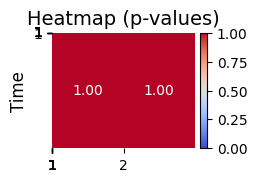

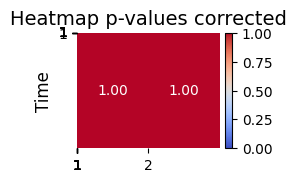

In [18]:
timepoint =0
method="regression"
figsize = (2,1.5)
title_text="Heatmap p-values corrected"
xlabel=""
# Plot p-values
plot_heatmap(pval, method, normalize_vals=True, figsize=figsize, steps=11, annot=True, xlabel=xlabel)
plot_heatmap(p_values_corrected, method, normalize_vals=True, figsize=figsize, steps=11, title_text=title_text, annot=True, xlabel=xlabel)

/content/my_functions.py:189: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x=np.arange(0, len(p_values)), y=-np.log10(p_values), hue=hue, style=hue,


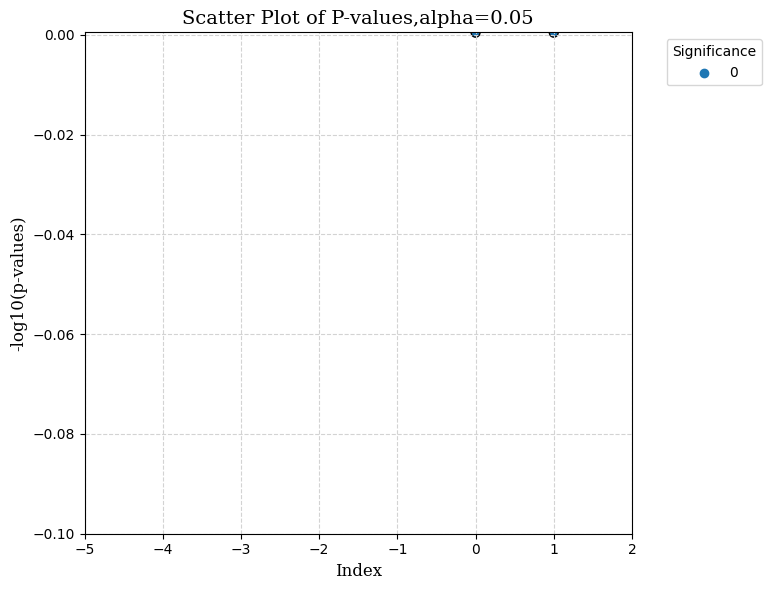

In [19]:
#Scatter plot for every timepoint at predictors 0
plot_scatter_with_labels(pval[0,:], alpha=0.05)


Plotting the test statistic for the channels that got a significant difference without correction at ```timepoint=0``` and for when the subject is seeing an animated object ```predictor_idx =1```

In [20]:
# Plot test statistics for uncorrected pvals
significant_timestamp_position, significant_indices = np.where(pval < alpha)
for i in significant_indices:
    plot_histograms(np.squeeze(test_statistic_list)[:,i])

### Step 3.1: Interpret Results
After running the permutation test, we can interpret the results.

- The ```p_values``` variable contains the p-values for the regression coefficients of each feature in ```X_data = [n_trials, n_subject, n_channels]``` for the whole timerseries.

The p-value represents the probability of observing a test statistic as extreme as (or more extreme than) the observed statistic, assuming the null hypothesis is true.




### Step 3.2: Example of usage - viterbi path Correlation
Similar to the previous example, we set the option parameter to "continuous" to run the Viterbi path with this option. We then call the ```within_session_continuous_tests``` function again and store the resulting p-values (pval) and correlation p-values (corr_pval).

In [21]:
n_states =2
method="correlation_com"
Nperm=1000
test_statistic_option=True
pval,corr_coef, test_statistic_list,pval_list =within_session_continuous_test(vpath_data, D_data, n_states=n_states,method=method,Nperm=Nperm,test_statistic_option=test_statistic_option)

performing permutation testing for whole data


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
100%|██████████| 1000/1000 [02:39<00:00,  6.28it/s]


### Step 3.1: P-value correction

In [22]:
from my_functions import *
alpha = 0.05
p_values_corrected,rejected_corrected  =pval_test(pval, alpha =alpha)
# Identify significant results after correction
significant_indices_corrected = np.where(p_values_corrected < alpha)

# Print the significant results
print("Significant Time Points (Thresholding + Correction):", significant_indices_corrected)

Significant Time Points (Thresholding + Correction): (array([0, 0]), array([0, 1]), array([0, 0]))


### Step 3.2: Visualize the p-values using heatmap at Timepont = 0
 Visualize the results by creating some plotting functions. Here's an example of how to plot the correlation coefficients and p-values.

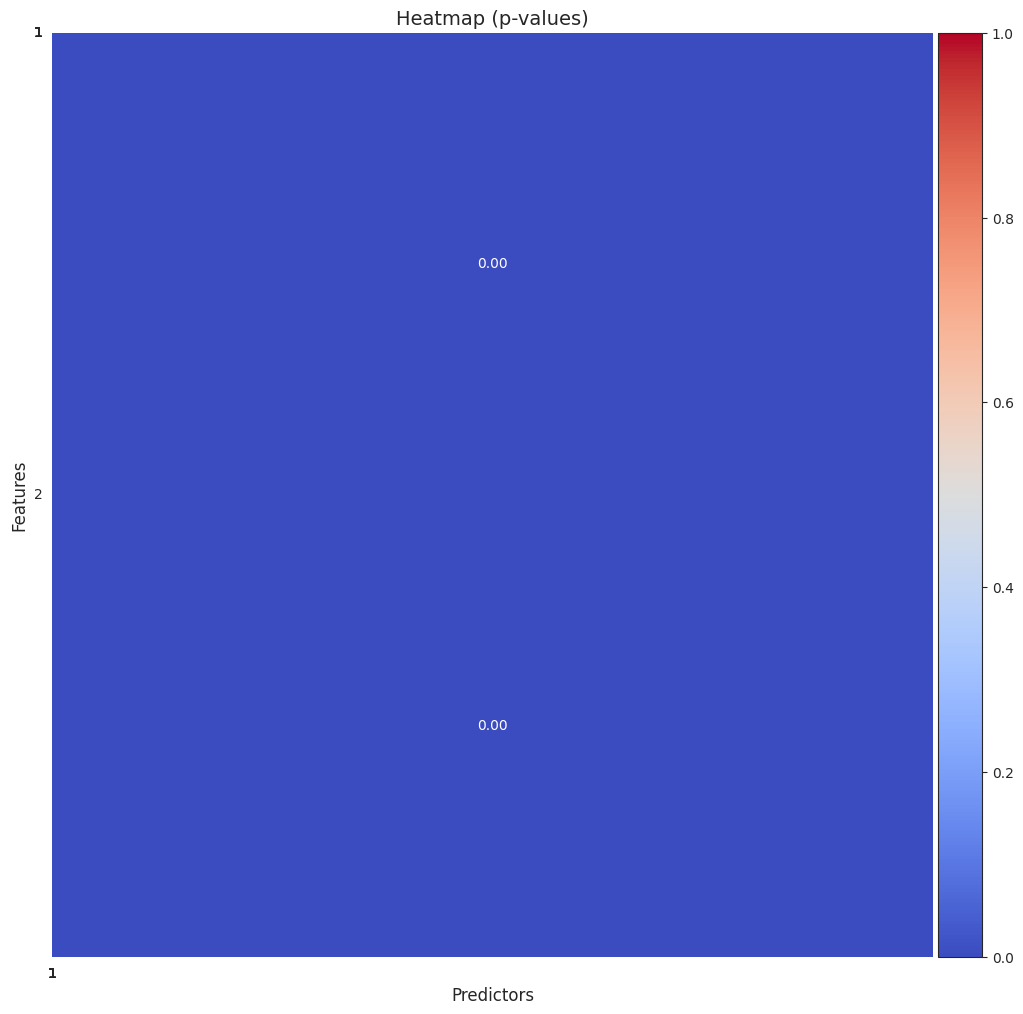

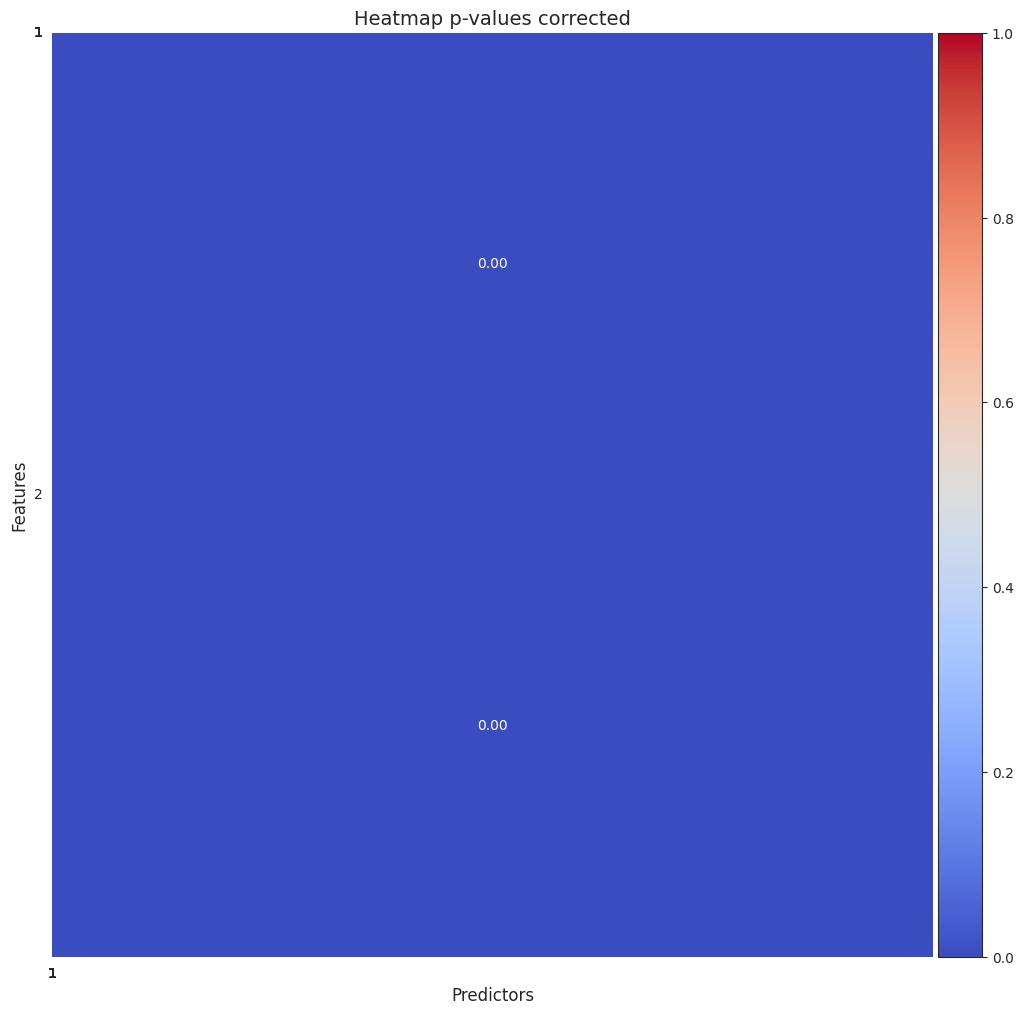

In [23]:
timepoint =0
# Plot p-values
plot_heatmap(pval[timepoint,:], method, figsize =(12,12), normalize_vals=True)
plot_heatmap(p_values_corrected[timepoint,:], method, figsize =(12,12), normalize_vals=True, title_text="Heatmap p-values corrected")

Heat map for correlation

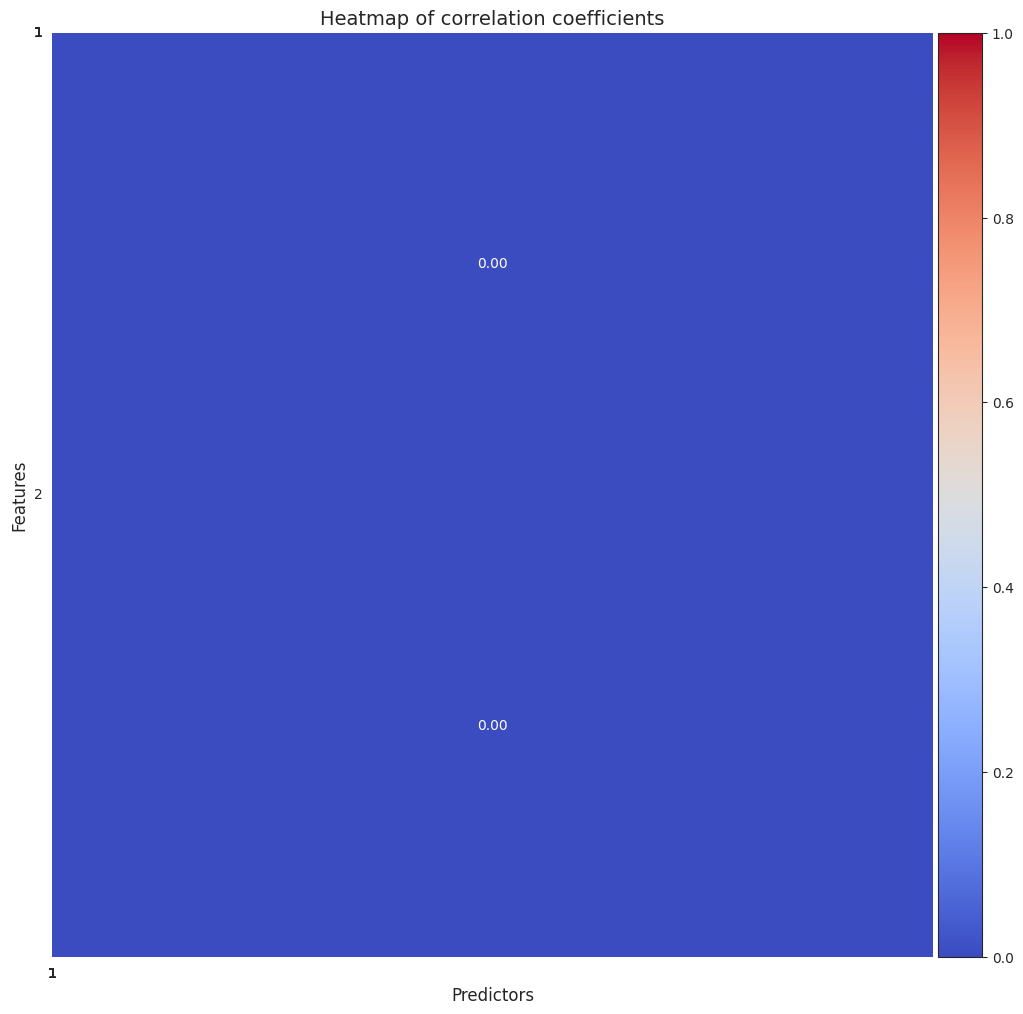

In [24]:
plot_heatmap(corr_coef[timepoint,:], method, figsize=(12,12), title_text="Heatmap of correlation coefficients")

### 3.2: Interpret Results
After running the permutation test using **correlation_com**, we can interpret the results.

In permutation with correlation, the p-values represent the significance of the correlation coefficients between each measurement feature (64 channels) in ```X_data=[n_timepoints, n_trials, n_feature]``` the behavioral measurements in ```D_data=[n_trials,]```, which is an array containing only 0s and 1s. The values in this array indicate whether an image of an animated or inanimate object. The lower the p-value, the stronger the evidence that the feature is significantly correlated with the behavioral measurements.

- If a p-value is less than the chosen significance level (```alpha=0.05```), you can reject the null hypothesis and conclude that there is a significant correlation between the measured feature and the behavioral measurement.

- If a p-value is greater than the significance level, you fail to reject the null hypothesis, indicating that there is no strong evidence of a significant correlation between the measured feature and the behavioral measurement.




### 3.2: Conclusion

The p-values in permutation with regression show how significant the regression coefficients between every feature and the behavioral measures are.
The more strongly the feature is showed to be statistically linked with the behavioral measurements, the lower the p-value must be.
Based on these p-values and the significance level chosen (alpha=0.05), it shows that we fail to reject the null hypothesis, indicating that there is no strong evidence of a significant relationship between the feature and the behavioral measurement.


## Final notes

In this tutorial, we explored how to use the ```within_session_continuous_tests``` function to run permutation testing with the Viterbi path. We demonstrated how to run the Viterbi path with by using the "VP" and permuting withing sessions (dafault) by setting the option parameter accordingly. The resulting p-values and corrected p-values provide insights into the statistical significance of the relationship between the input data and dependent variable data over time.

Feel free to experiment with different parameter settings and further analyze the results based on your specific research requirements.

I hope this tutorial helps! Let me know if you have any further questions.